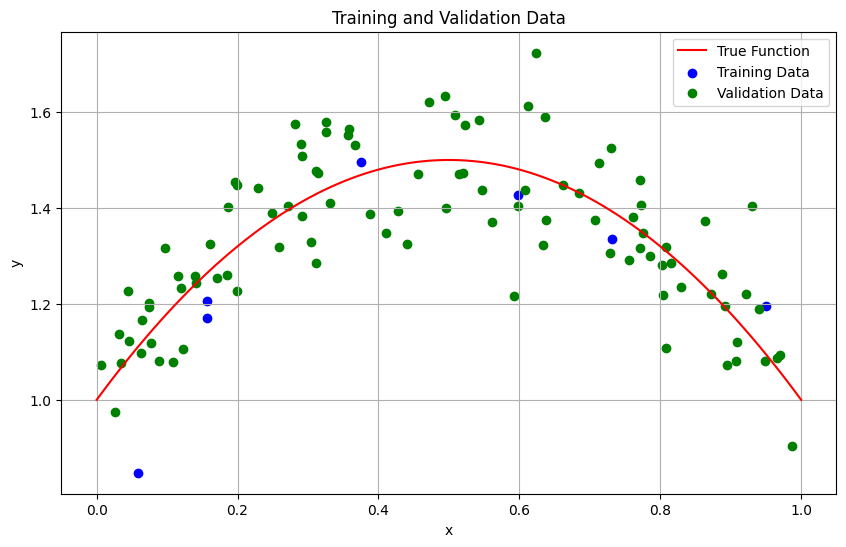

In [36]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return 1 + 2 * x - 2 * x**2

np.random.seed(42)
num_train_samples = 7
x_train = np.random.rand(num_train_samples)
y_train = f(x_train) + 0.1 * np.random.normal(size=num_train_samples)

num_validation_samples = 100
x_validation = np.random.rand(num_validation_samples)
y_validation = f(x_validation) + 0.1 * np.random.normal(size=num_validation_samples)

x_values = np.linspace(0, 1, 100)
plt.figure(figsize=(10, 6))
plt.plot(x_values, f(x_values), 'r-', label='True Function')
plt.scatter(x_train, y_train, color='blue', label='Training Data')
plt.scatter(x_validation, y_validation, color='green', label='Validation Data')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Training and Validation Data')
plt.legend()
plt.grid(True)
plt.show()


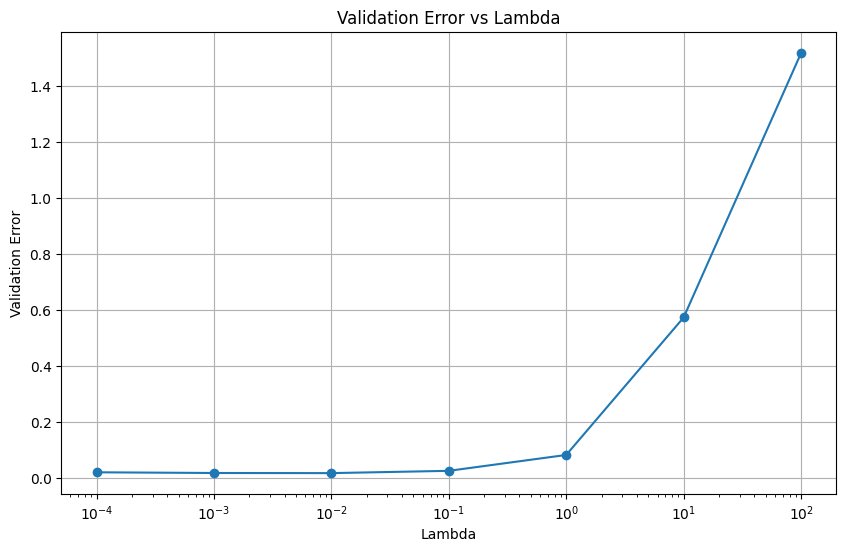

In [38]:
def polynomial_features(x, degree):
    return np.array([x**i for i in range(degree + 1)]).T

def ridge_regression(x, y, lambda_val):
    X = polynomial_features(x, degree=6)
    XtX = np.dot(X.T, X)
    lambda_I = lambda_val * np.eye(X.shape[1])
    weights = np.linalg.solve(XtX + lambda_I, np.dot(X.T, y))
    return weights

def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

lambda_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
validation_errors = []

for lambda_val in lambda_values:
    weights = ridge_regression(x_train, y_train, lambda_val)

    X_validation = polynomial_features(x_validation, degree=6)
    y_pred_validation = np.dot(X_validation, weights)

    validation_error = mean_squared_error(y_validation, y_pred_validation)
    validation_errors.append(validation_error)

plt.figure(figsize=(10, 6))
plt.plot(lambda_values, validation_errors, marker='o', linestyle='-')
plt.xscale('log')
plt.xlabel('Lambda')
plt.ylabel('Validation Error')
plt.title('Validation Error vs Lambda')
plt.grid(True)
plt.show()

In [39]:
underfit_lambda_index = np.argmax(validation_errors)
optimal_lambda_index = np.argmin(validation_errors)
overfit_lambda_index = np.argmin(validation_errors[:optimal_lambda_index])

underfit_lambda = lambda_values[underfit_lambda_index]
overfit_lambda = lambda_values[overfit_lambda_index]
optimal_lambda = lambda_values[optimal_lambda_index]

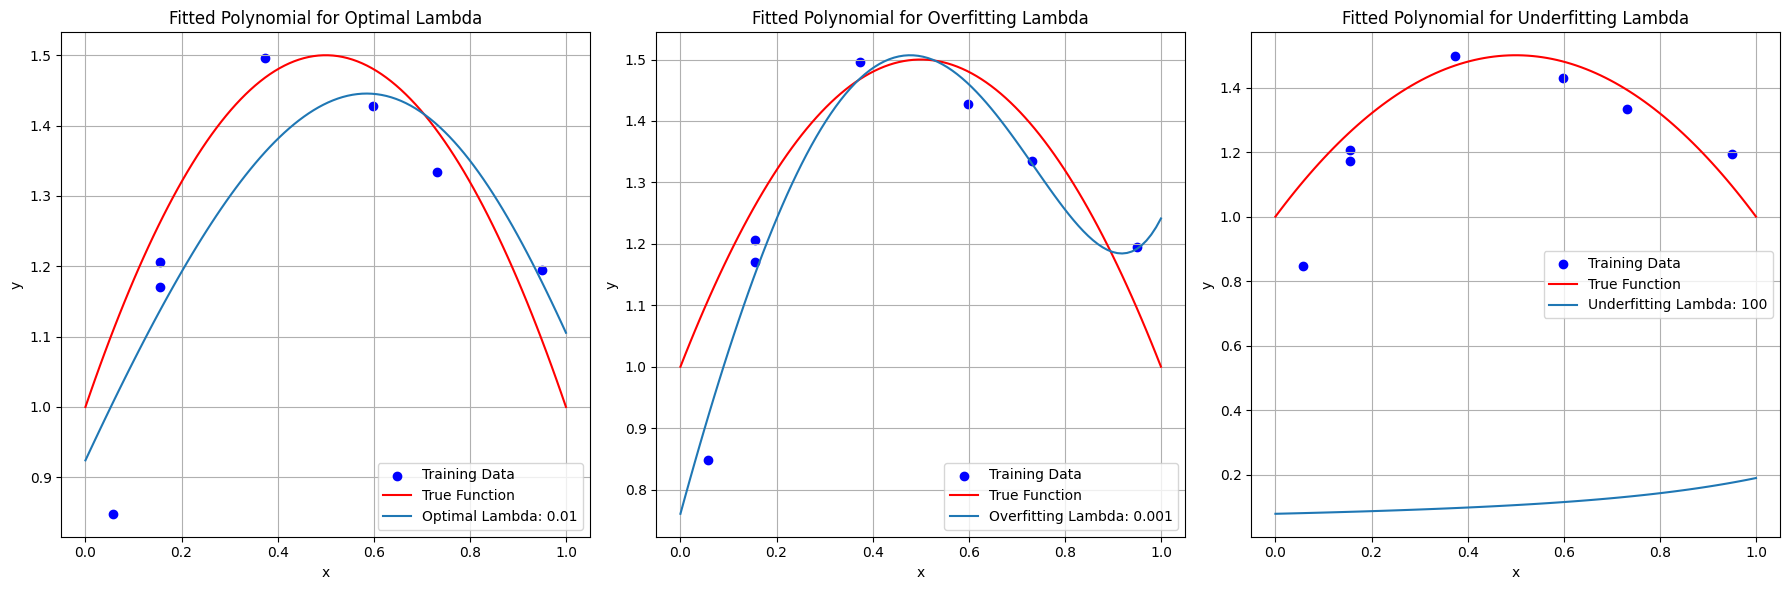

In [40]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Optimal Lambda
axs[0].scatter(x_train, y_train, color='blue', label='Training Data')
axs[0].plot(x_values, f(x_values), 'r-', label='True Function')

weights_optimal = ridge_regression(x_train, y_train, optimal_lambda)
y_pred_optimal = np.dot(polynomial_features(x_values, degree=6), weights_optimal)
axs[0].plot(x_values, y_pred_optimal, label=f'Optimal Lambda: {optimal_lambda}')

axs[0].set_xlabel('x')
axs[0].set_ylabel('y')
axs[0].set_title('Fitted Polynomial for Optimal Lambda')
axs[0].legend()
axs[0].grid(True)

# Overfitting Lambda
axs[1].scatter(x_train, y_train, color='blue', label='Training Data')
axs[1].plot(x_values, f(x_values), 'r-', label='True Function')

weights_overfit = ridge_regression(x_train, y_train, overfit_lambda)
y_pred_overfit = np.dot(polynomial_features(x_values, degree=6), weights_overfit)
axs[1].plot(x_values, y_pred_overfit, label=f'Overfitting Lambda: {overfit_lambda}')

axs[1].set_xlabel('x')
axs[1].set_ylabel('y')
axs[1].set_title('Fitted Polynomial for Overfitting Lambda')
axs[1].legend()
axs[1].grid(True)

# Underfitting Lambda
axs[2].scatter(x_train, y_train, color='blue', label='Training Data')
axs[2].plot(x_values, f(x_values), 'r-', label='True Function')

weights_underfit = ridge_regression(x_train, y_train, underfit_lambda)
y_pred_underfit = np.dot(polynomial_features(x_values, degree=6), weights_underfit)
axs[2].plot(x_values, y_pred_underfit, label=f'Underfitting Lambda: {underfit_lambda}')

axs[2].set_xlabel('x')
axs[2].set_ylabel('y')
axs[2].set_title('Fitted Polynomial for Underfitting Lambda')
axs[2].legend()
axs[2].grid(True)

plt.tight_layout()
plt.show()
